# Problem Statement :
- **You have been provided with a banking dataset that contains marketing insights for various
campaigns that were run for the customers for a duration of time.** 
- **Using your machine learning
and analytical skills - provide actionable insights that will be useful for the company to plan
striking and efficient marketing campaigns for their products.**

# Title of Project
### Bank Marketing Campaign Project


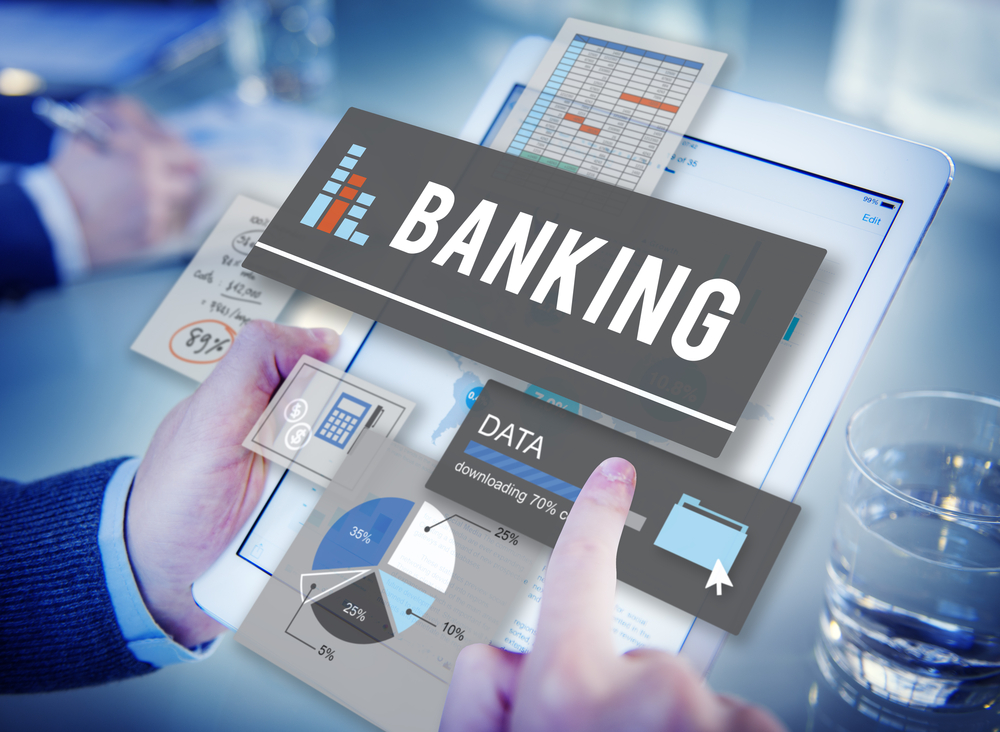

#Dataset Information:

- **age** - Age of the customer
- **job** - Profession of the customer
- **marital** - Marital status of the customer
- **education** - Educational qualification of the customer
- **default** - Does the customer have credit in default?
- **balance** - Average yearly balance
- **housing** - Does the customer have a housing loan?
- **loan** - Does the customer have a personal loan?
- **contact** - Contact communication type of the customer
- **day** - Last contact day of the month
- **month** - Last contact month of the year
- **duration** - Last contact duration in seconds
- **campaign** - Number of contacts during campaign
- **pdays** - Number of days since last contact
- **previous** - Number of contacts before campaign
- **poutcome** - Outcome of previous campaign
- **y** - Has the customer subscribed for a deposit?



## Import libraries

In [ ]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

import plotly.express as px

from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE



from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  KFold,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

warnings.filterwarnings('ignore')

## Unzip the folder

In [ ]:
# !unzip /content/drive/MyDrive/capastone_project/Banking-Campaign-1.zip -d /content/drive/MyDrive/capastone_project

## Read the file

In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/capastone_project/train.csv', sep=';')
df_test=pd.read_csv('/content/drive/MyDrive/capastone_project/test.csv',sep=';')


In [ ]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# EDA (Exploratory Data Analysis)

In [ ]:
# shape of training data set
df_train.shape

(45211, 17)

In [ ]:
# shape of testing data set
df_test.shape

(4521, 17)

In [ ]:
# meta data

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# checking null values

df_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Analysis of data
 - There are 45211 rows  and 17 columns
 - Some of the columns are object type and some are of int type

- No null values is there in datasset

In [ ]:
# describe 

df_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Statistical Analysis of numerical columns
## Age
- Minimum age of customer is 18 year and maximum age is 95 year.

## balance 
- Minimum balance is -8019 and the maximum balance is 102127.

## duration
- Minimum time of contact duration is 0 second and maximum duration is 4918 seconds

## compaing
- Minimum number of contact with customer in campaign is 1 and the maximum number of contacts is 63.

## pday
- Minimum and maximum number of days since last contact with customer in campaign are -1 and 	871.

## previuos
- Minimum and maximum number of contacts before campaign are 0 and 275 respectively

In [ ]:
# description of categorica column

df_train.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [ ]:
df_train['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

#  Statistical Analysis of numerical columns
## Job
- There are 12 unique values in Job
- Most of the customers belongs to  blue-collar Job

## marital
- There are 3 uniques values in marital 
- Most of the customers are married

## education
- There are 4 unique categories in education columns
- Most of the customers belongs to secondary education class

## default
- There are 2 categories in dafault columns either customer is defaulter or not
- Most of the customer are not defaulters with frequency of 44396

## Housing
- There are 2 categories in housing columns either person has housing loan or not
- Most of the customers are having the housing loan

## loan
- There are 2 categories in loan columns either person has personal loan or not
- Most of the customers are not having the personal loan

## contact
- There are 3 categories in contact columns
- Most of the customers are using cellular phone

## poutcome
- There are 4 categories in poutcome columns
- Most of the outcome of prevoius compaign are unknown
 
##y
- This column has 2 categories either person has subscribed or not subscribed for deposit
- Most of the customers have not subscribed for deposit


# Visualizing the target column

In [ ]:
## ploting the bar plot

px.bar( x=df_train['y'].value_counts(),y=df_train['y'].value_counts().index, orientation='h',labels=[])

In [ ]:
df_train['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

## Analysis of bar plot
- Data is highly imbalanced
- Approximate 88.3% values belongs to class no
- We have to handle this imbalancy 
- We can use undersampling or oversampling methods to handle imbalancy

# check  outliers
- Draw boxplot to check outliers

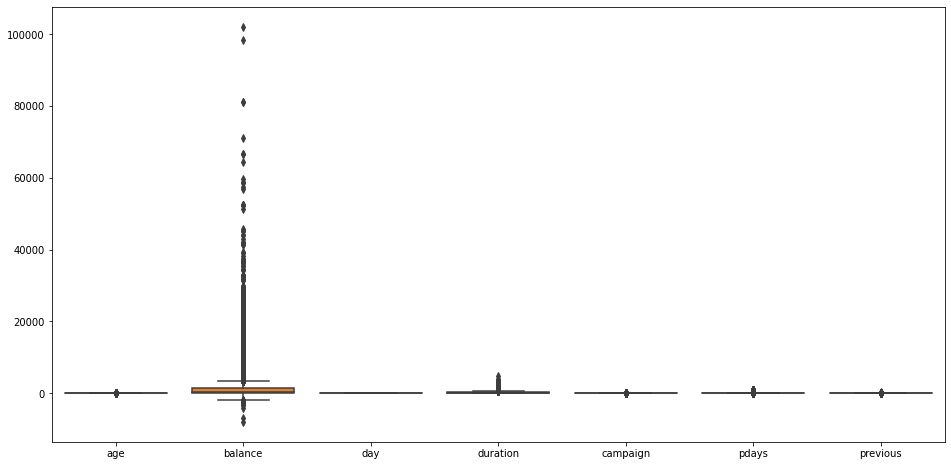

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df_train)

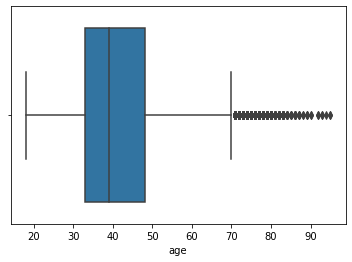

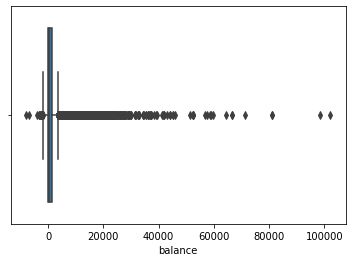

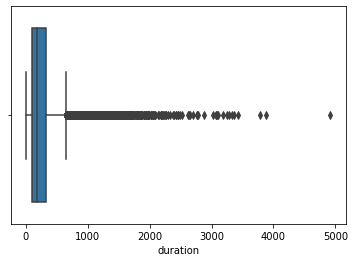

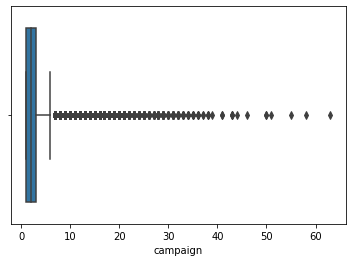

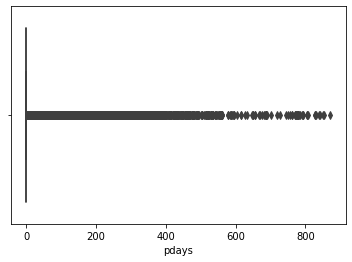

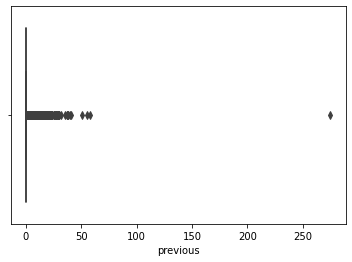

In [ ]:
num=[col for col in df_train.columns if df_train[col].dtype=='int']

for col in num:
  if col != 'day' :
    sns.boxplot(df_train[col])
    plt.show()

In [ ]:
# removing outliers by using quantile 

df_new=df_train.copy()

q1=df_new['balance'].quantile(0.01)
q2=df_new['balance'].quantile(0.98)
df_new=df_new[(df_new['balance']>q1) & (df_new['balance']<q2)]


q=df_new['duration'].quantile(0.98)
df_new=df_new[df_new['duration']<q]

q=df_new['pdays'].quantile(0.98)
df_new=df_new[df_new['pdays']<q]

q=df_new['campaign'].quantile(0.98)
df_new=df_new[df_new['campaign']<q]

q=df_new['previous'].quantile(0.999)
df_new=df_new[df_new['previous']<q]



In [ ]:
df_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Visaulization

In [ ]:
cat_col=[col for col in df_new.columns if df_new[col].dtypes=='object']
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

## Univariate analysis

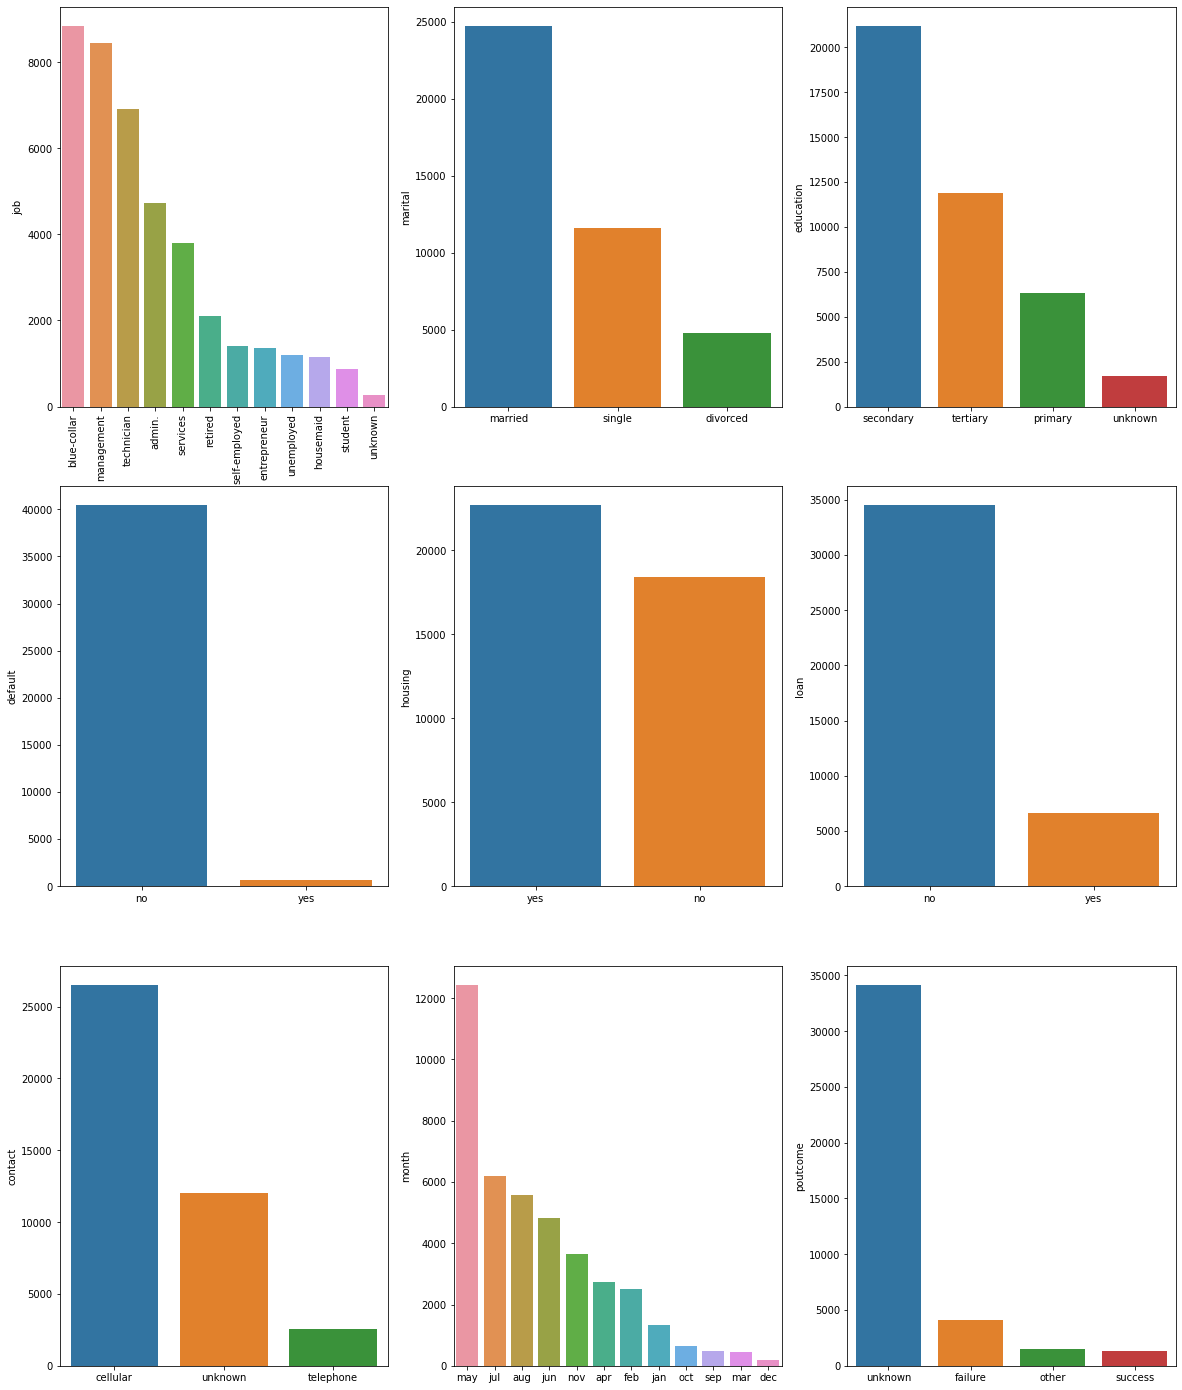

In [ ]:
fig,axes=plt.subplots(3,3,figsize=(20,25))
axes=axes.flatten()

sns.barplot(ax=axes[0],x=df_new['job'].value_counts().index, y=df_new['job'].value_counts())
axes[0].set_xticklabels(df_new['job'].value_counts().index,rotation=90)

sns.barplot(ax=axes[1],x=df_new['marital'].value_counts().index, y=df_new['marital'].value_counts())

sns.barplot(ax=axes[2],x=df_new['education'].value_counts().index, y=df_new['education'].value_counts())

sns.barplot(ax=axes[3],x=df_new['default'].value_counts().index, y=df_new['default'].value_counts())

sns.barplot(ax=axes[4],x=df_new['housing'].value_counts().index, y=df_new['housing'].value_counts())

sns.barplot(ax=axes[5],x=df_new['loan'].value_counts().index, y=df_new['loan'].value_counts())

sns.barplot(ax=axes[6],x=df_new['contact'].value_counts().index, y=df_new['contact'].value_counts())

sns.barplot(ax=axes[7],x=df_new['month'].value_counts().index, y=df_new['month'].value_counts())

sns.barplot(ax=axes[8],x=df_new['poutcome'].value_counts().index, y=df_new['poutcome'].value_counts())





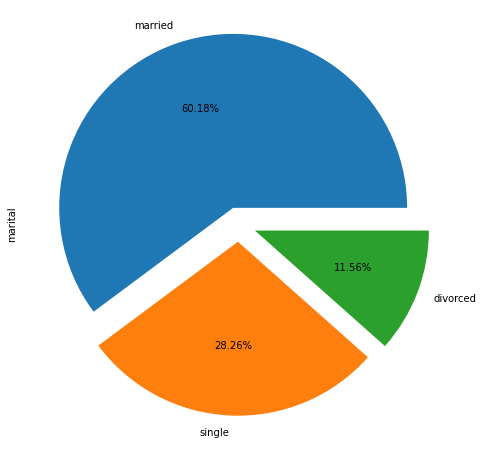

In [ ]:
## pie plot

plt.figure(figsize=(10,8))
df_new['marital'].value_counts().plot.pie( explode=[0.1,0.1,0.1], autopct='%1.2f%%')

## Multivarite analysis

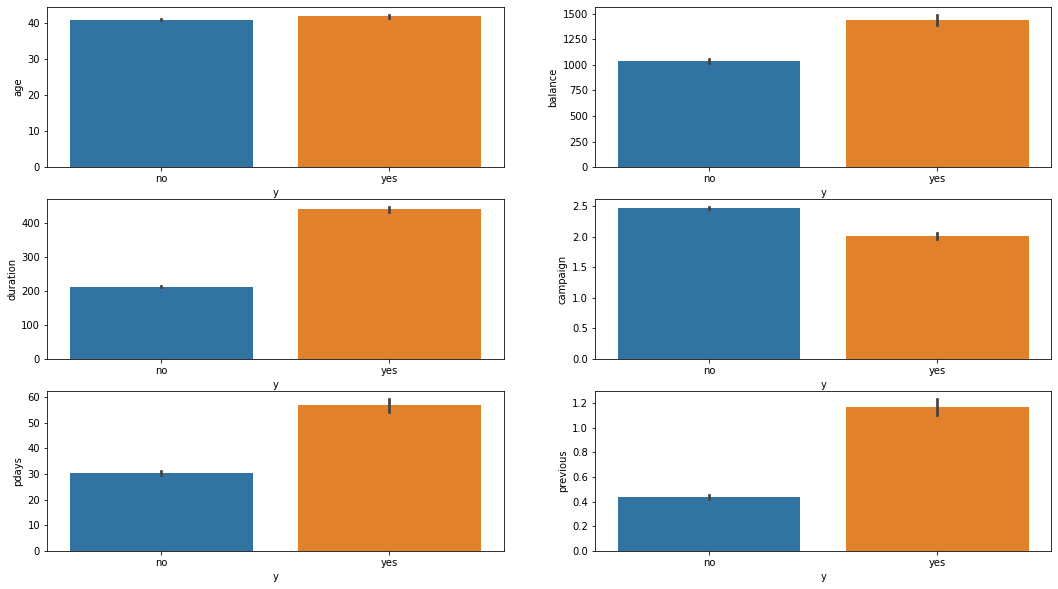

In [ ]:

fig,axes=plt.subplots(3,2,figsize=(18,10))
axes=axes.flatten()

sns.barplot(ax=axes[0],x=df_new['y'],y=df_new['age'])
sns.barplot(ax=axes[1],x=df_new['y'],y=df_new['balance'])
sns.barplot(ax=axes[2],x=df_new['y'],y=df_new['duration'])
sns.barplot(ax=axes[3],x=df_new['y'],y=df_new['campaign'])
sns.barplot(ax=axes[4],x=df_new['y'],y=df_new['pdays'])
sns.barplot(ax=axes[5],x=df_new['y'],y=df_new['previous'])

# Analysis of bar plots

## Age
- The age of person is similar for both category whether they are going to  subscribed for deposit or not

## Balance
- The customers who have subscribed for deposit, have more balance

## Duration
-  The time duration of contact is higher for those customers who have subscribed for deposit

## campaign
- During the campaign more contacts are done for those who have not subscribed for deposit

## pdays
- The number of days for last contact is less for those customer who have not subscribed for deposit

## previous

- Most of the customers who subscribed for deposit are those who were in contact before starting of campaign 

In [ ]:
# numericla columns

num_col=[col for col in df_new.columns if df_new[col].dtype=='int']
num_col

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

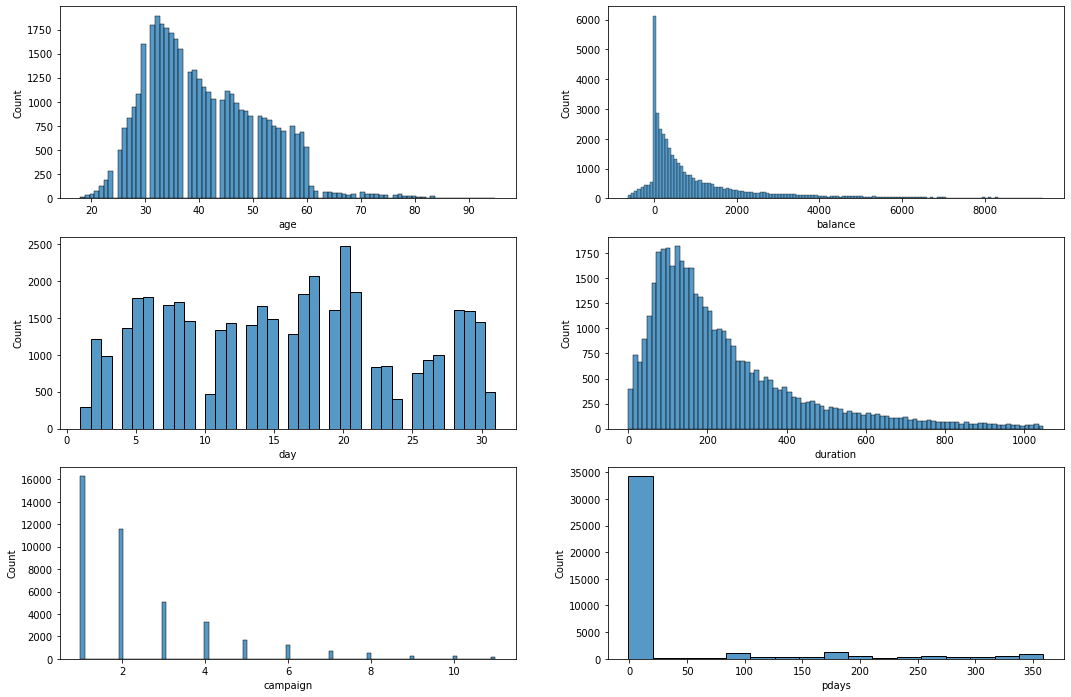

In [ ]:
# drawing histogram

fig,axes=plt.subplots(3,2, figsize=(18,12))
axes=axes.flatten()

sns.histplot(df_new['age'],ax=axes[0])

sns.histplot(df_new['balance'],ax=axes[1])

sns.histplot(df_new['day'],ax=axes[2])

sns.histplot(df_new['duration'],ax=axes[3])

sns.histplot(df_new['campaign'],ax=axes[4])

sns.histplot(df_new['pdays'],ax=axes[5])


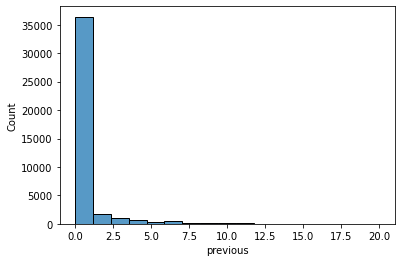

In [ ]:
sns.histplot(df_new['previous'])

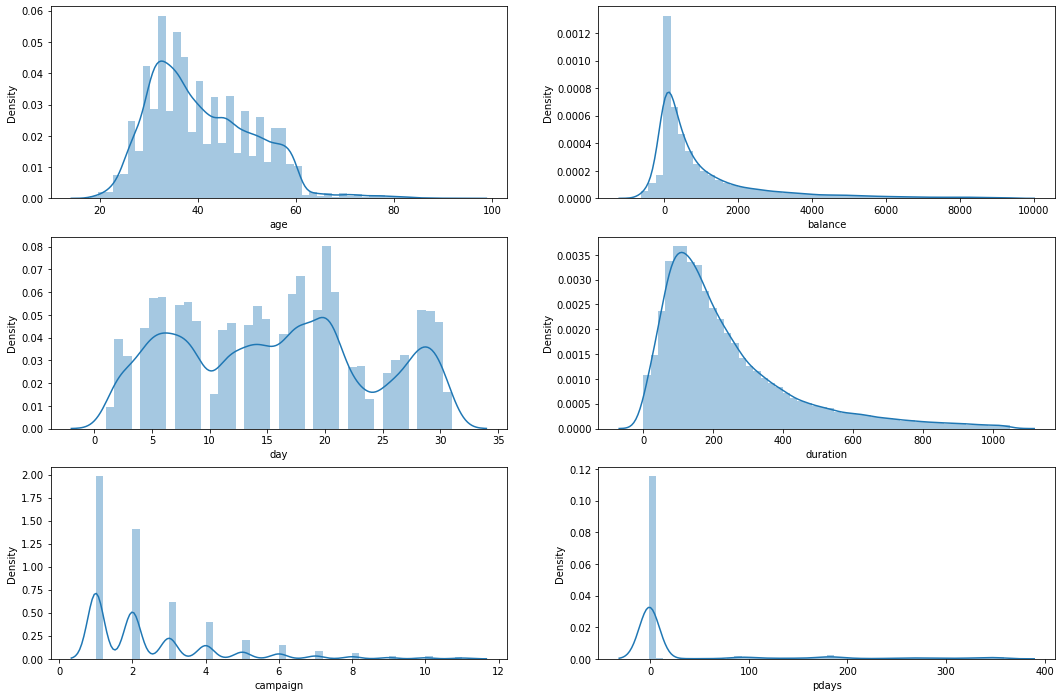

In [ ]:
# drawing histplot

fig,axes=plt.subplots(3,2, figsize=(18,12))
axes=axes.flatten()

sns.distplot(df_new['age'],ax=axes[0])

sns.distplot(df_new['balance'],ax=axes[1])

sns.distplot(df_new['day'],ax=axes[2])

sns.distplot(df_new['duration'],ax=axes[3])

sns.distplot(df_new['campaign'],ax=axes[4])

sns.distplot(df_new['pdays'],ax=axes[5])
plt.show()

## Analysis of histogram and distplot

- Generally Histogram and distplot are used for numerical data types
- Histogram and distplot are used to show the ditribution of data
- Most of the columns are rightly skewed.
- Some columns are moderately right skewed like as age and duration
- Some columns are highly right skewed like as balance pdays and previous

## Correlation graph

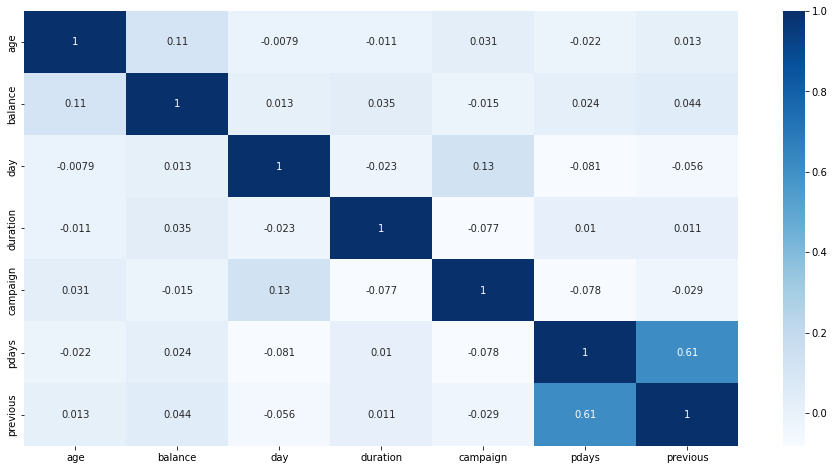

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df_new.corr(), annot=True, cmap='Blues')

## Analysis of correlation graph
- No high correlation is there between features
- So there is no multicollinearity
- Only pdays is moderatily correlated with previous and vice versa

## Split the data into feautures and target columns



In [ ]:
## spliting the training data set
x=df_new.drop('y',axis=1)
y= df_new[['y']]


## spliting the testing data set
x_test=df_test.drop('y',axis=1)
y_test= df_test[['y']]


## Spliting the data into train and validation

In [ ]:
# spliting the data into training and validation set

from sklearn.model_selection import train_test_split

x_train,x_valid, y_train, y_valid= train_test_split(x,y,test_size=0.10, random_state=21)

In [ ]:
x_train.shape, x_valid.shape,x_test.shape

((36967, 16), (4108, 16), (4521, 16))

# Encoding the categorical data

### converting target (y) column into numerical values
- yes=1
- no =0 


In [ ]:
# use maping

y_train['y']=y_train['y'].map({'yes':1, 'no':0})
y_valid['y']=y_valid['y'].map({'yes':1,'no':0})

y_test['y']=y_test['y'].map({'yes':1,'no':0})

In [ ]:
# apply pd.get_dummies for encoding the categorical data

cat_col = [col for col in x_train.columns if x_train[col].dtype=='object']

x_train=pd.get_dummies(x_train,columns=cat_col,drop_first=True)

x_valid=pd.get_dummies(x_valid,columns=cat_col,drop_first=True)

x_test=pd.get_dummies(x_test,columns=cat_col,drop_first=True)

In [ ]:
# using one hot encoding

# from sklearn.preprocessing import OneHotEncoder

# cat_col=[col for col in x_train.columns if x_train[col].dtypes=='object']
# data_cat=x_train[cat_col]


# encodeing the categorical data
# ohe=OneHotEncoder()

# encoded=ohe.fit_transform(x_train[cat_col]).toarray()
# test_encode=ohe.transform(x_test[cat_col]).toarray()

# print the all categories name  
# ohe.categories_

# Over Sampling
- Data set is highly imbalance 
- So to make the data balance we are using Over sampling

In [ ]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(sampling_strategy='minority',random_state=1)

x_train,y_train=sm.fit_resample(x_train,y_train)


## Feature Scaling
- Applying the robust scaler 

In [ ]:
from sklearn.preprocessing import RobustScaler

rb=RobustScaler()

train_num_data=rb.fit_transform(x_train[num_col])

valid_num_data=rb.transform(x_valid[num_col])

test_num_data=rb.transform(x_test[num_col])



In [ ]:
x_train[num_col]=train_num_data

x_valid[num_col]=valid_num_data

x_test[num_col]=test_num_data

In [ ]:
# see the skewness  in data set
for col in num_col:
  print(f'The skewness of {col} is  ', x_train[col].skew())

The skewness of age is   0.7503435519545201
The skewness of balance is   2.09815128124449
The skewness of day is   0.15377269599381319
The skewness of duration is   1.0245486623262419
The skewness of campaign is   2.2730168160388073
The skewness of pdays is   2.0075946595692837
The skewness of previous is   3.7459344301774378


# Feature selection 
- Using RFE for numerical columns to select important features
- Using chi2 for categorical columns to select important features

#### Numerical columns
- Using RFE (Recursive feature elimination) for feature selection


In [ ]:
# numerical columns 

num_col=[col for col in x_train.columns if x_train[col].dtype=='float' ]
num_col

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
# using Recursive feature elimination for numerical columns


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE



x_train_num=x_train[num_col]

sel=RFE(LogisticRegression(random_state=2),n_features_to_select=5)

sel.fit(x_train_num,y_train)


RFE(estimator=LogisticRegression(random_state=2), n_features_to_select=5)

In [ ]:
sel_num_col=pd.DataFrame(sel.get_support(),index=x_train_num.columns,columns=['Selected'])
sel_num_col

,Selected
age,False
balance,True
day,True
duration,True
campaign,True
pdays,False
previous,True


In [ ]:
## selecting the important numerical columns

sel_num_col=x_train_num.columns[sel.get_support()]
sel_num_col

Index(['balance', 'day', 'duration', 'campaign', 'previous'], dtype='object')

#### Categorical columns
- Using chi2 and selectKBest for feature selection

In [ ]:
# importing chi2
from sklearn.feature_selection import SelectKBest,chi2

# storing the name of categorical columns name in list
cat_col=[col for col in x_train.columns if x_train[col].dtypes !='float']
cat_col

# defining the number of features we want to select
sel=SelectKBest(chi2,k=25)


x_train_cat=x_train[cat_col]

# fit the categorical columns data for selection

sel.fit(x_train_cat,y_train)



SelectKBest(k=25, score_func=<function chi2 at 0x7f5d97a20ca0>)

In [ ]:
# selecting the importatnt  categorical columns 
sel_cat_col=pd.DataFrame(sel.get_support(), index=x_train_cat.columns,columns=['Selected'])
sel_cat_col

,Selected
job_blue-collar,True
job_entrepreneur,True
job_housemaid,True
job_management,True
job_retired,False
job_self-employed,True
job_services,True
job_student,False
job_technician,True
job_unemployed,False


In [ ]:
# selecting the important features

sel_cat_col=x_train_cat.columns[sel.get_support()]
sel_cat_col

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_self-employed', 'job_services', 'job_technician',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_may', 'month_nov',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [ ]:
# adding all selected  the numerical and categorical columns in  one list

sel_total_col=list(sel_num_col)

for col in sel_cat_col:
  sel_total_col.append(col)

sel_total_col




['balance',
 'day',
 'duration',
 'campaign',
 'previous',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_self-employed',
 'job_services',
 'job_technician',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'contact_unknown',
 'month_aug',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_may',
 'month_nov',
 'poutcome_success',
 'poutcome_unknown']

In [ ]:
# final training data

x_train_final=x_train[sel_total_col]
x_train_final

,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_self-employed,...,contact_unknown,month_aug,month_feb,month_jan,month_jul,month_jun,month_may,month_nov,poutcome_success,poutcome_unknown
0,-0.261548,-0.583333,-0.250784,-1.0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,-0.305791,1.083333,-0.705329,0.0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,-0.181522,-0.833333,-0.194357,-1.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,-0.156799,0.166667,0.200627,-1.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.541314,-0.916667,0.090909,-1.0,0.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66091,0.266103,-0.500000,0.216301,2.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
66092,3.648016,-0.333333,1.786834,1.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
66093,0.448276,1.250000,0.934169,-1.0,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
66094,0.507482,-0.333333,0.021944,-1.0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# final validation data

x_valid_final=x_valid[sel_total_col]
x_valid_final

,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_self-employed,...,contact_unknown,month_aug,month_feb,month_jan,month_jul,month_jun,month_may,month_nov,poutcome_success,poutcome_unknown
37970,1.213403,-0.083333,-0.498433,-1.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
23949,-0.188029,1.166667,-0.373041,2.0,0.0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
16970,-0.157450,0.833333,-0.257053,0.0,0.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
26445,-0.505530,0.416667,0.319749,-1.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36528,1.182173,-0.250000,-0.658307,2.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,-0.355888,0.833333,-0.128527,-1.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9918,1.337671,-0.500000,0.968652,-1.0,0.0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
37980,0.481457,-0.083333,0.003135,1.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
27802,-0.056604,1.083333,-0.608150,-1.0,0.0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
# final test data

x_test_final=x_test[sel_total_col]
x_test_final

,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_self-employed,...,contact_unknown,month_aug,month_feb,month_jan,month_jul,month_jun,month_may,month_nov,poutcome_success,poutcome_unknown
0,0.806766,0.333333,-0.536050,-1.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.759922,-0.333333,-0.094044,-1.0,4.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.522446,0.083333,-0.203762,-1.0,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.604424,-1.000000,-0.159875,2.0,0.0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
4,-0.355888,-0.833333,-0.075235,-1.0,0.0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.572544,1.250000,0.247649,3.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4517,-2.511386,-0.500000,-0.304075,-1.0,0.0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
4518,-0.163956,0.333333,-0.310345,9.0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4519,0.383865,-0.750000,-0.379310,2.0,3.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Model Training

cv_score of Log_reg is 0.9178641583042058

calssification report of Log_reg is 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      3655
           1       0.49      0.52      0.50       453

    accuracy                           0.89      4108
   macro avg       0.71      0.73      0.72      4108
weighted avg       0.89      0.89      0.89      4108

cv_score of decision_tree is 0.9111462584399501

calssification report of decision_tree is 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      3655
           1       0.40      0.46      0.42       453

    accuracy                           0.86      4108
   macro avg       0.66      0.69      0.67      4108
weighted avg       0.87      0.86      0.87      4108

cv_score of random_forest is 0.932373344240783

calssification report of random_forest is 
               precision    recall  f1-score   support

           0       0.94  

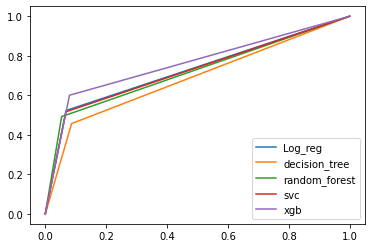

In [ ]:
# train multiple models


models={'Log_reg':LogisticRegression(),
       'decision_tree':DecisionTreeClassifier(),
       'random_forest':RandomForestClassifier(),
       'svc':SVC(),
       'xgb':XGBClassifier()}


kfold=KFold(n_splits=5)

for key, model in models.items():
  clf=model.fit(x_train_final,y_train)
  cv_score=cross_val_score(model,x_train_final,y_train,cv=5)
  y_pred=clf.predict(x_valid_final)
  classification=classification_report(y_valid,y_pred)
  fpr,tpr,_=roc_curve(y_valid,y_pred)
  print(f'cv_score of {key} is', cv_score.mean())
  print(f'\ncalssification report of {key} is \n', classification)


  plt.plot(fpr,tpr,label=key)
  plt.legend()

# Select Best Model
- As we can see in roc curve the xgb has maximum area undr curve so we can the best performing model among other models that are used here
- Or from the classification report of all the model we can see xgb is the best performing model among others

- So we are selecting XGB as best performing model here

## XGBoost

In [ ]:
#train the xgboost

xgb= XGBClassifier(random_state=3)
xgb.fit(x_train_final,y_train)

XGBClassifier(random_state=3)

In [ ]:
## Prediction

y_pred_valid=xgb.predict(x_valid_final)


## Performance

#### Performance with validation data

In [ ]:
# classificationn report with validation data

print(classification_report(y_valid,y_pred_valid))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3655
           1       0.48      0.60      0.54       453

    accuracy                           0.89      4108
   macro avg       0.72      0.76      0.73      4108
weighted avg       0.90      0.89      0.89      4108



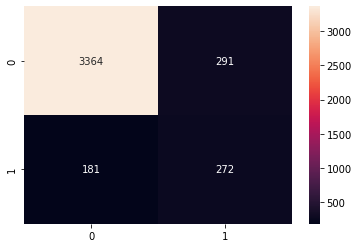

In [ ]:
# confusion_matrix 

sns.heatmap(confusion_matrix(y_valid,y_pred_valid),annot=True, fmt='g')

#### Performance with test data

In [ ]:
# prediction of test data

y_pred_test=xgb.predict(x_test_final)

In [ ]:
# classification report of model with test data

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      4000
           1       0.50      0.62      0.56       521

    accuracy                           0.89      4521
   macro avg       0.73      0.77      0.75      4521
weighted avg       0.90      0.89      0.89      4521



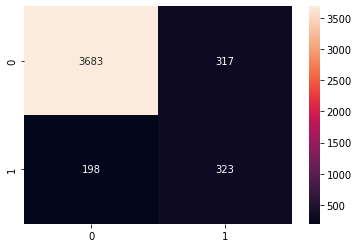

In [ ]:
# confusion_matrix 

sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True, fmt='g')

## Hyper parameter tuning
- Use Random Search CV for hyper tuning

In [ ]:
# import random serach cv

from sklearn.model_selection import RandomizedSearchCV

xgbh=XGBClassifier(n_jobs=-1)


# define the tuning parameters

params={'max_depth':[3,6,10,15,20],
        'learning_rate':[0.001,0.01,0.05,0.1],
        'n_estimators':[50,100,150,200,250,300],
        'reg_alpha':[0.01,0.2,0.4,0.5,0.8],
        'reg_lambda':[0.01,0.3,0.5,0.8,1],
        'ccp_alpha':[0.001,0.005,0.01,0.05,0.1,0.5,1]
        }

In [ ]:
# cretaing object of random serach cv class

rscv=RandomizedSearchCV(estimator=xgb,param_distributions=params)

# fit the data for hypertuning

rscv.fit(x_train_final,y_train)

RandomizedSearchCV(estimator=XGBClassifier(n_jobs=-1),
                   param_distributions={'ccp_alpha': [0.001, 0.005, 0.01, 0.05,
                                                      0.1, 0.5, 1],
                                        'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1],
                                        'max_depth': [3, 6, 10, 15, 20],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300],
                                        'reg_alpha': [0.01, 0.2, 0.4, 0.5, 0.8],
                                        'reg_lambda': [0.01, 0.3, 0.5, 0.8, 1]})

In [ ]:
# best parameters
rscv.best_params_

{'reg_lambda': 0.3,
 'reg_alpha': 0.8,
 'n_estimators': 200,
 'max_depth': 15,
 'learning_rate': 0.05,
 'ccp_alpha': 0.001}

In [ ]:
# define  the model with best parameters

xgbh=XGBClassifier(n_jobs=-1,
                   reg_lambda =0.3,
                   reg_alpha= 0.8,
                   n_estimators= 200,
                   max_depth= 15,
                   learning_rate= 0.05,
                   ccp_alpha= 0.001)

In [ ]:
# train the model

xgbh.fit(x_train_final,y_train)

XGBClassifier(ccp_alpha=0.001, learning_rate=0.05, max_depth=15,
              n_estimators=200, n_jobs=-1, reg_alpha=0.8, reg_lambda=0.3)

In [ ]:
# prediction 

train_pred=xgbh.predict(x_train_final)

valid_pred=xgbh.predict(x_valid_final)

test_pred=xgbh.predict(x_test_final)

### Performance of hypertuned model

In [ ]:
# classification report of hypertuned model with test data

print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4000
           1       0.81      0.88      0.84       521

    accuracy                           0.96      4521
   macro avg       0.90      0.92      0.91      4521
weighted avg       0.96      0.96      0.96      4521



In [ ]:
# classification report of hypertuned model with train data

print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     33048
           1       0.99      1.00      0.99     33048

    accuracy                           0.99     66096
   macro avg       0.99      0.99      0.99     66096
weighted avg       0.99      0.99      0.99     66096



In [ ]:
## accuracy score
print('The accuracy score of model is ', round(accuracy_score(y_test,test_pred)*100,3),'%')

The accuracy score of model is  96.24 %


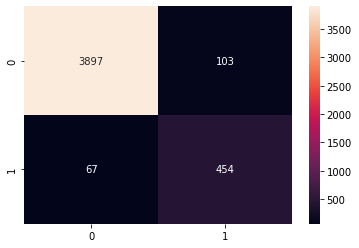

In [ ]:
# confusion matrix 

sns.heatmap(confusion_matrix(y_test,test_pred),annot=True, fmt='g')

### Comparision between model performance before hypertuning or after hypertuning

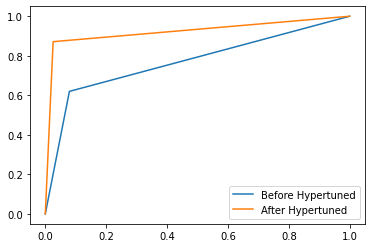

In [ ]:
fpr1,tpr1,_=roc_curve(y_test,y_pred_test)
fpr2,tpr2,_=roc_curve(y_test,test_pred)

plt.plot(fpr1,tpr1,label='Before Hypertuned')
plt.plot(fpr2,tpr2,label='After Hypertuned')
plt.legend()

# Conclusion
- As we can see in from the roc curve the area under the curve for hypertuned model is larger than simple model
- So we can say after hypertuning the model performance is increased

## Pickling and unpickling the model

In [ ]:
# saving the model in pickle format

import pickle

file_path='/content/drive/MyDrive/capastone_project/xgb_model.pkl'

pickle.dump(xgbh,open(file_path,'wb'))

In [ ]:
# load the model

load_model=pickle.load(open(file_path,'rb'))
load_model

XGBClassifier(ccp_alpha=0.001, learning_rate=0.05, max_depth=15, missing=nan,
              n_estimators=200, n_jobs=-1, reg_alpha=0.8, reg_lambda=0.3)